## Assignment for Ensemble Techniques
<b>Name: Preneeth O <br>
Batch: 12</b>

## Introduction##

This assignment deals with marketing campaign data of a bank. Based on the available data we need to build a model to predict whether the customer will subscribe to term deposit or not.

Dataset: <a https://olympus.greatlearning.in/courses/6626/files/359345/download?download_frd=1 > bank-full.csv </a>

### Step 1: Import the necessary libraries ###

In [47]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

#import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from scipy.stats import zscore
from sklearn.metrics import f1_score
from scipy import stats

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, precision_recall_fscore_support
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from IPython.display import Markdown

%matplotlib inline

sn.set(color_codes = True)
estimators_count=50
random_state_count=7

### Step 2: Read the data as a data frame ###

In [48]:
dataFrame = pd.read_csv('Bank-full.csv')
dataFrame.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Step 3. Perform Basic EDA
* Find the shape of the data & various columns
* Check the presence of missing values
* Understand the values in each column
* Descriptive stats of numerical columns
* Find the distribution of numerical columns and presence of outliers 
* Distribution of categorical columns

In [49]:
#Shape and column names
print(dataFrame.shape)
print (list(dataFrame.columns))
#dataFrame.job.value_counts()



(45211, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'Target']


<b>Findings:</b> There are 45211 rows and 17 columns

In [50]:
#Check for missing values & data types
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [51]:
#Understand each categorical column values
print ("Job : ")
print (*list(dataFrame.job.unique()))

print ("Marital : ")
print (*list(dataFrame.marital.unique()))

print ("Education : ")
print (*list(dataFrame.education.unique()))

print ("Default : ")
print (*list(dataFrame.default.unique()))

print ("Housing : ")
print (*list(dataFrame.housing.unique()))

print ("Loan : ")
print (*list(dataFrame.loan.unique()))

print ("Contact : ")
print (*list(dataFrame.contact.unique()))

print ("Month : ")
print (*list(dataFrame.month.unique()))

print ("poutcome : ")
print (*list(dataFrame.poutcome.unique()))

Job : 
management technician entrepreneur blue-collar unknown retired admin. services self-employed unemployed housemaid student
Marital : 
married single divorced
Education : 
tertiary secondary unknown primary
Default : 
no yes
Housing : 
yes no
Loan : 
no yes
Contact : 
unknown cellular telephone
Month : 
may jun jul aug oct nov dec jan feb mar apr sep
poutcome : 
unknown failure other success


#### Consolidated view of the raw data

<Table border=1, align=left>
<TR align=left>
    <TH>#</TH>
    <TH>Col Name</TH>
    <TH>Description</TH>
    <TH>Type</TH>
    <TH>Data Type</TH>
    <TH>Categorical Attributes</TH>
    <TH>Remarks</TH>
</TR>

<TR >
    <TD>1.</TD>
    <TD>
        Age
    </TD>
    <TD>
        Age of customer
    </TD>
    <TD>Independent Feature</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        &nbsp;
    </TD>
</TR>


<TR >
    <TD>2.</TD>
    <TD>
        Job
    </TD>
    <TD>
        Job of Customer
    </TD>
    <TD>Independent Feature</TD>
     <TD>
        Text
    </TD>
     <TD>
        Yes
    </TD>
     <TD>
        There are 12 categories. Need to convert into numeric codes.
    </TD>
</TR>

<TR>
    <TD>3.</TD>
    <TD>
        Marital
    </TD>
    <TD>
        Marital status of customer
    </TD>
    <TD>Independent Feature</TD>
     <TD>
        Text
    </TD>
     <TD>
        Yes
    </TD>
     <TD>
       There are 3 categories. Need to convert into numeric codes.
    </TD>
</TR>

<TR>
    <TD>4.</TD>
    <TD>
        Education
    </TD>
    <TD>
        Education of customer
    </TD>
    <TD>Independent Feature</TD>
     <TD>
        Text
    </TD>
     <TD>
        Yes
    </TD>
     <TD>
       There are 4 categories. Need to convert into numeric codes.
    </TD>
</TR>

<TR>
    <TD>5.</TD>
    <TD>
        Default
    </TD>
    <TD>
        Has credit in default?
    </TD>
    <TD>Independent Feature</TD>
     <TD>
        Text
    </TD>
     <TD>
        Yes
    </TD>
     <TD>
       There are 2 (Yes, No) categories. Need to convert into numeric codes.
    </TD>
</TR>

<TR>
    <TD>6.</TD>
    <TD>
        Balance
    </TD>
    <TD>
        Average yearly balance, in euros
    </TD>
    <TD>Independent Feature</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
       &nbsp;
    </TD>
</TR>

<TR>
    <TD>7.</TD>
    <TD>
        Housing
    </TD>
    <TD>
        Has housing loan?
    </TD>
    <TD>Independent Feature</TD>
     <TD>
        Text
    </TD>
     <TD>
        Yes
    </TD>
     <TD>
       There are 2 (Yes, No) categories. Need to convert into numeric codes.
    </TD>
</TR>

<TR>
    <TD>8.</TD>
    <TD>
        Loan
    </TD>
    <TD>
        Has personal loan?
    </TD>
    <TD>Independent Feature</TD>
     <TD>
        Text
    </TD>
     <TD>
        Yes
    </TD>
     <TD>
       There are 2 (Yes, No) categories. Need to convert into numeric codes.
    </TD>
</TR>

<TR>
    <TD>9.</TD>
    <TD>
        Contact
    </TD>
    <TD>
        Contact communication type
    </TD>
    <TD>Independent Feature</TD>
     <TD>
        Text
    </TD>
     <TD>
        Yes
    </TD>
     <TD>
       There are 3  categories. Need to convert into numeric codes.
    </TD>
</TR>

<TR>
    <TD>10.</TD>
    <TD>
        Day
    </TD>
    <TD>
        Last contact day of the month
    </TD>
    <TD>Independent Feature</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
       &nbsp;
    </TD>
</TR>

<TR>
    <TD>11.</TD>
    <TD>
        Month
    </TD>
    <TD>
        Last contact month of year 
    </TD>
    <TD>Independent Feature</TD>
     <TD>
        Text
    </TD>
     <TD>
        Yes
    </TD>
     <TD>
       Need to convert into numeric codes.
       
    </TD>
</TR>



<TR>
    <TD>12.</TD>
    <TD>
        Duration
    </TD>
    <TD>
        Last contact duration, in seconds
    </TD>
    <TD>Independent Feature</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
      Need to check the significance of this feature.
    </TD>
</TR>

<TR>
    <TD>13.</TD>
    <TD>
        Campaign
    </TD>
    <TD>
        Number of contacts performed during this campaign and for this client
    </TD>
    <TD>Independent Feature</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
       &nbsp;
    </TD>
</TR>

<TR >
    <TD>14.</TD>
    <TD>
        Pdays 
    </TD>
    <TD>
        Number of days that passed by after the client was last contacted from a previous campaign
    </TD>
    <TD>Independent Feature</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
       &nbsp;
    </TD>
</TR>

<TR >
    <TD>15.</TD>
    <TD>
        Previous 
    </TD>
    <TD>
        Number of contacts performed before this campaign and for this client
    </TD>
    <TD>Independent Feature</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
       &nbsp;
    </TD>
</TR>

<TR >
    <TD>16.</TD>
    <TD>
        Poutcome 
    </TD>
    <TD>
        outcome of the previous marketing campaign
    </TD>
    <TD>Independent Feature</TD>
     <TD>
        Text
    </TD>
     <TD>
        Yes
    </TD>
     <TD>
       There are 4  categories. Need to convert into numeric codes.
    </TD>
</TR>


<TR style="font-weight:bold">
    <TD>17.</TD>
    <TD>
        target 
    </TD>
    <TD>
        has the client subscribed a term deposit?
    </TD>
    <TD>Dependent Feature (Target)</TD>
     <TD>
        Text
    </TD>
     <TD>
        Yes
    </TD>
     <TD>
       Yes - Subscribed to Term Deposit, No - Not Subscribed to Term Deposit
        Need to convert into numeric codes.
    </TD>
</TR>



</Table>

<b>Findings:</b> 
    * Target column is the Target Feature. 
    * There are 10 categorical columns, which needs to be converted into numerical codes.
    * There are 7 numericial columns
    * Looking at the above data there is no missing data
    

#### EDA for categorical features

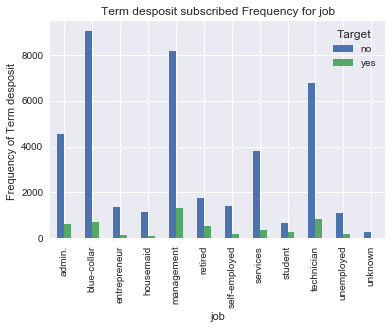

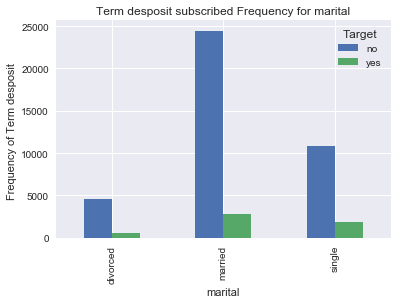

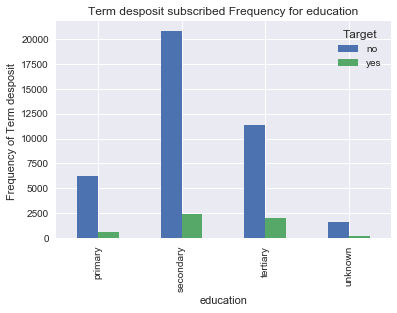

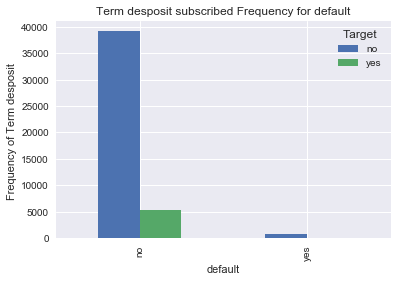

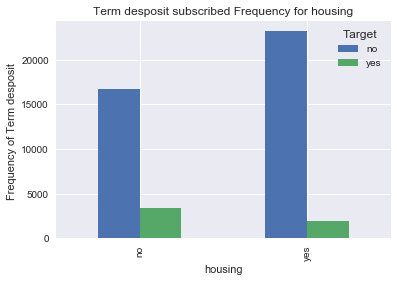

In [52]:
#Plots to see the distribution of the categorical features individually

def comparisionWithTarget(col, pos):
    pd.crosstab(col,dataFrame.Target).plot(kind='bar')   
    plt.title('Term desposit subscribed Frequency for '+ col.name)
    plt.xlabel(col.name)
    plt.ylabel('Frequency of Term desposit ')
    
plt.figure(figsize= (20,180))
comparisionWithTarget(dataFrame.job, 1)
comparisionWithTarget(dataFrame.marital, 2)
comparisionWithTarget(dataFrame.education, 3)
comparisionWithTarget(dataFrame.default,4)
comparisionWithTarget(dataFrame.housing,5)

plt.show()

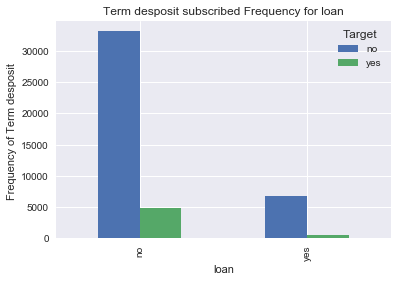

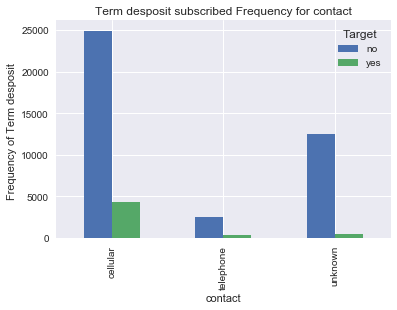

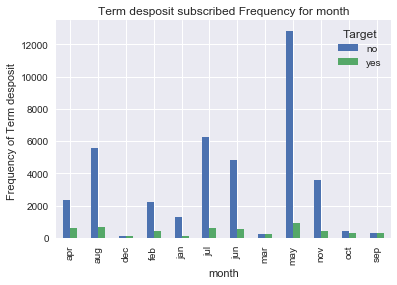

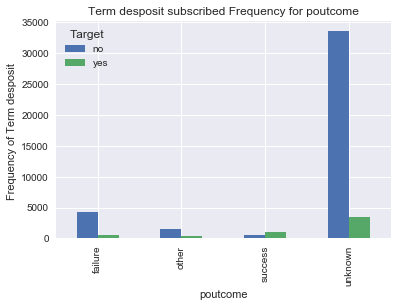

In [53]:
plt.figure(figsize= (20,180))


comparisionWithTarget(dataFrame.loan,6)
comparisionWithTarget(dataFrame.contact,7)
comparisionWithTarget(dataFrame.month,8)
comparisionWithTarget(dataFrame.poutcome,9)


plt.show()

<b>Findings:</b> The frequency of Term deposit subscribed  depends a great deal on all categorical attributes 
    . Thus, all the categorical attributes can be a good predictor of the outcome variable.


In [54]:
# Encoding Categorical columns to numberic values as machine learning model will not understand text values

#Added this temporarily here
#dataFrame = pd.read_csv('Bank-full.csv')

dataFrame.job = pd.Categorical(dataFrame.job).codes
dataFrame.marital = pd.Categorical(dataFrame.marital).codes
dataFrame.education = pd.Categorical(dataFrame.education).codes
dataFrame.default = pd.Categorical(dataFrame.default).codes
dataFrame.housing = pd.Categorical(dataFrame.housing).codes
dataFrame.loan = pd.Categorical(dataFrame.loan).codes
dataFrame.contact = pd.Categorical(dataFrame.contact).codes
dataFrame.poutcome = pd.Categorical(dataFrame.poutcome).codes
replace_month_map = {'month': {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
                                  'may': 5, 'jun': 6, 'jul': 7 , 'aug': 8 , 'sep': 9,'oct': 10,'nov': 11, 'dec': 12}}
dataFrame.replace(replace_month_map,inplace=True)

replace_target_map = {'Target': {'no': 0, 'yes': 1}}
dataFrame.replace(replace_target_map,inplace=True)


dataFrame.Target = pd.Categorical(dataFrame.Target).codes

dataFrame.job = dataFrame.job.astype('category')
dataFrame.marital = dataFrame.marital.astype('category')
dataFrame.education = dataFrame.education.astype('category')
dataFrame.default = dataFrame.default.astype('category')
dataFrame.housing = dataFrame.housing.astype('category')
dataFrame.loan = dataFrame.loan.astype('category')
dataFrame.contact = dataFrame.contact.astype('category')
dataFrame.poutcome = dataFrame.poutcome.astype('category')
dataFrame.month = dataFrame.month.astype('category')
dataFrame.Target = dataFrame.Target.astype('category')
dataFrame.day = dataFrame.day.astype('category')

dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null category
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(11), int64(6)
memory usage: 2.5 MB


### EDA for Continous Features

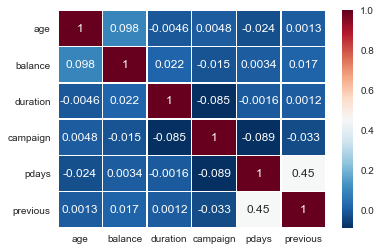

In [55]:
#find correlation between continous variables
pearsoncorr = dataFrame[['Target','age', 'balance','day', 'duration',  'campaign', 'pdays', 'previous']].corr(method='pearson')
sn.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

/Users/preneeth/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/preneeth/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


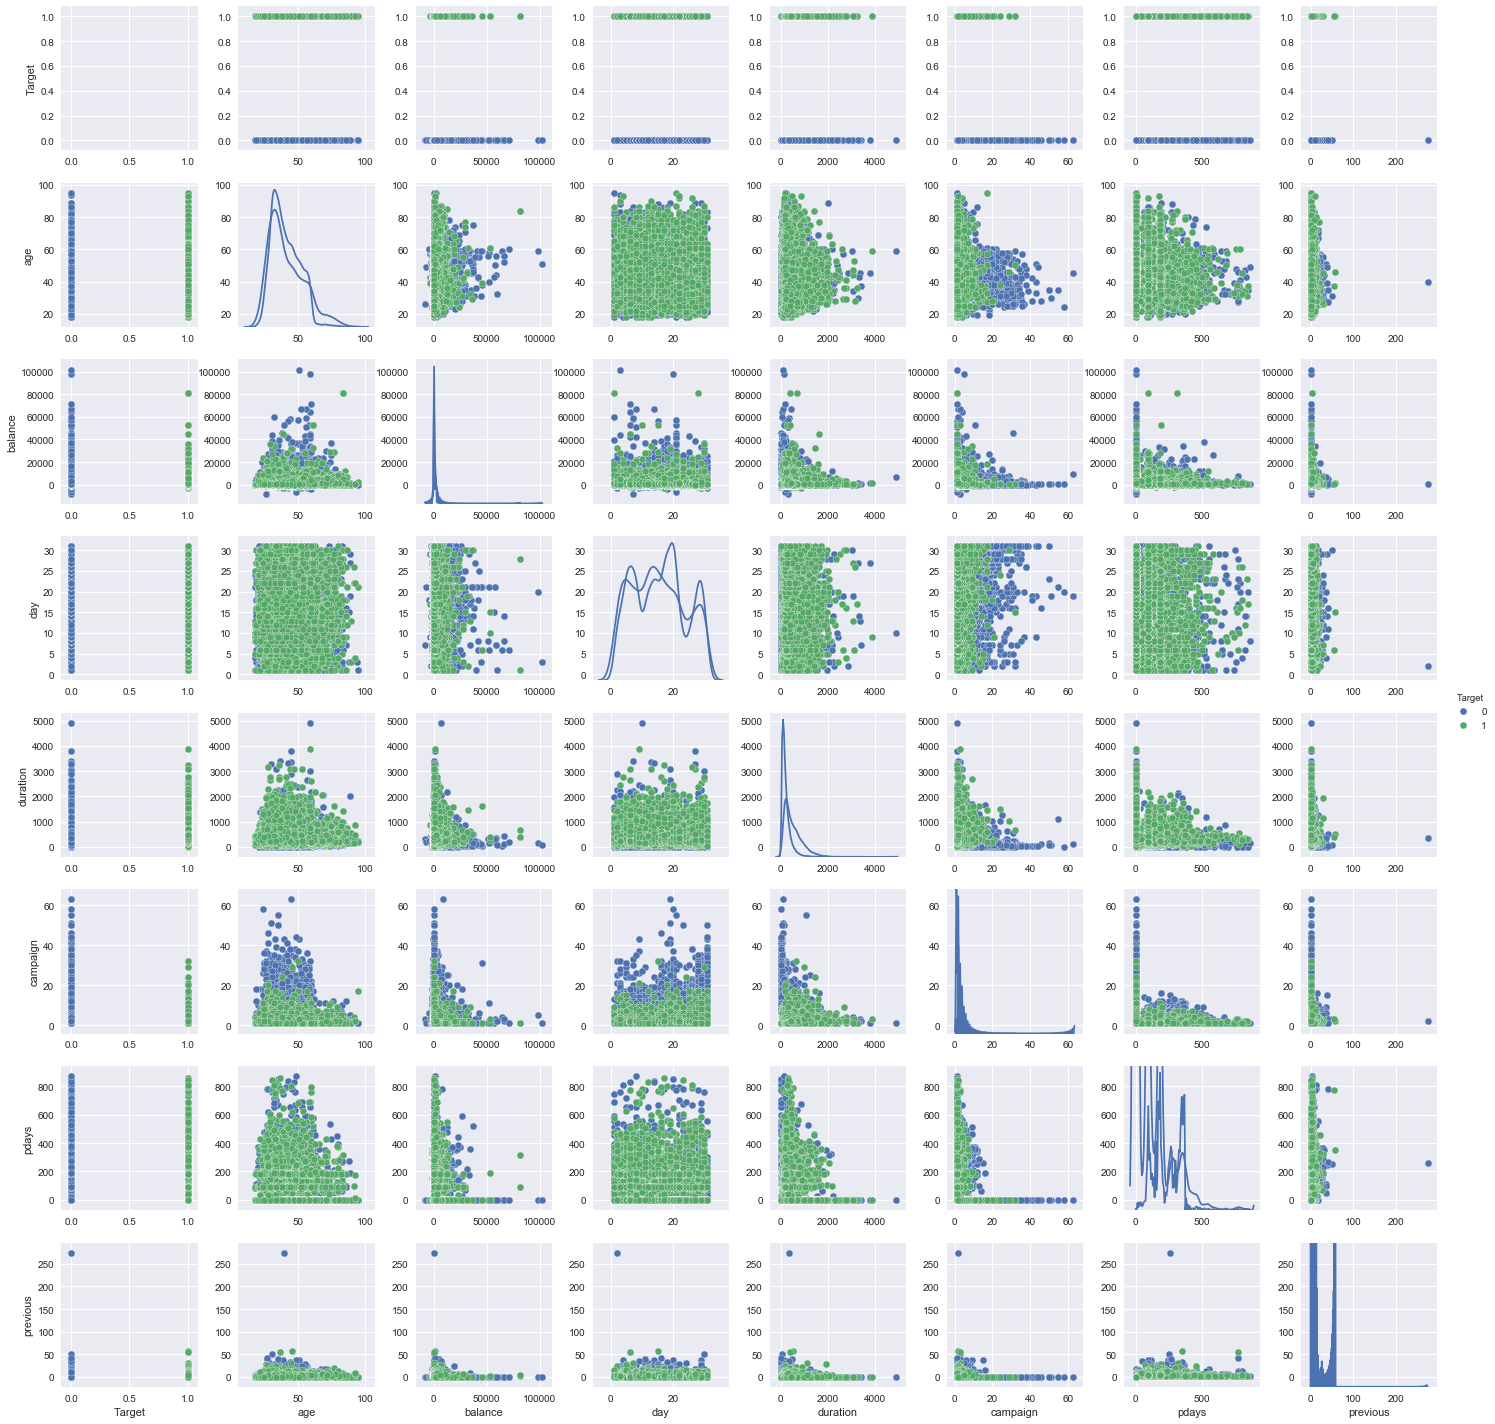

In [56]:
sn.pairplot(dataFrame, hue='Target', diag_kind="kde", \
            vars=['Target','age', 'balance','day', 'duration',  'campaign', 'pdays', 'previous'])

<b>Findings:</b> 
    * There is no strong correlation between any of the continous variables

In [57]:
# five point summary of the continuous attributes
dataFrame[['age', 'balance','day', 'duration', 'campaign', 'pdays', 'previous']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


<b>Findings:</b> 
    * Pdays data seems to be having mostly -1 value. Most of the customers were not contacted after the previous campaign.

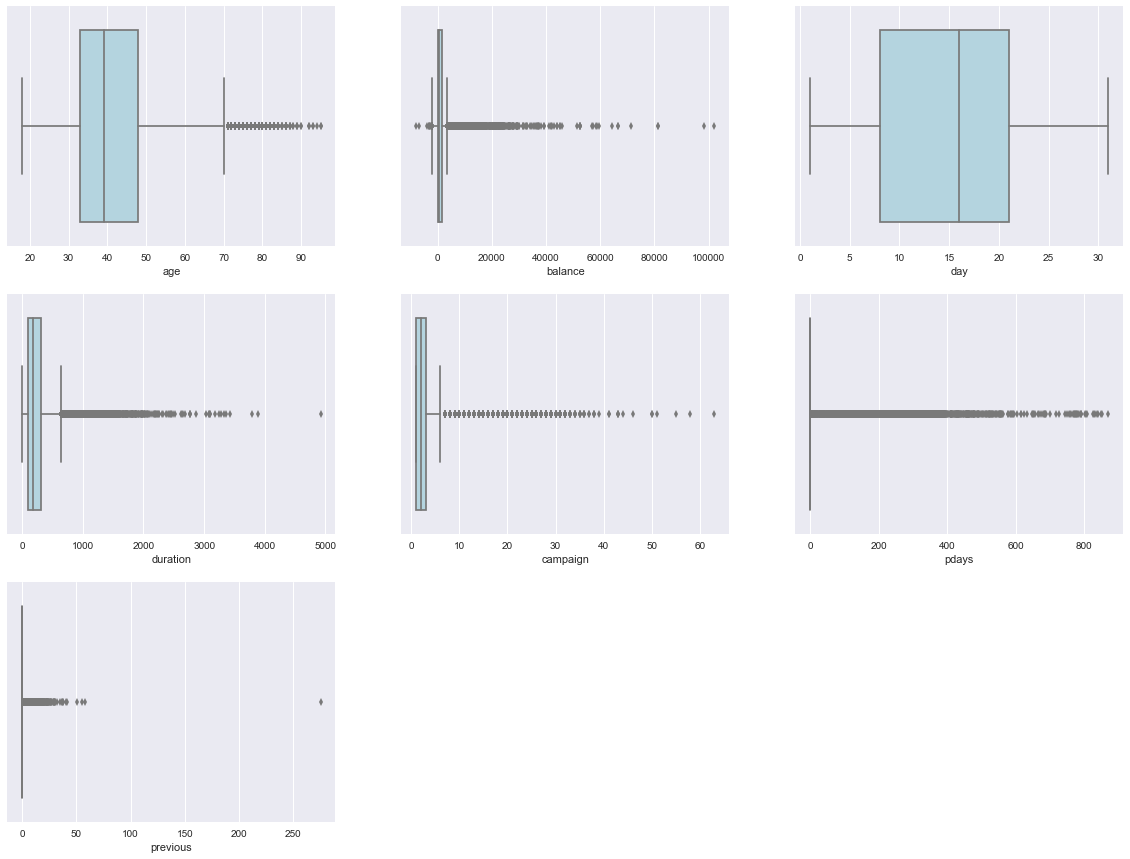

In [58]:
# Plot continuous attributes for outliers

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)

sn.boxplot(x= dataFrame.age, color='lightblue')

plt.subplot(3,3,2)
sn.boxplot(x= dataFrame.balance, color='lightblue')

plt.subplot(3,3,3)
sn.boxplot(x= dataFrame.day, color='lightblue')

plt.subplot(3,3,4)
sn.boxplot(x= dataFrame.duration, color='lightblue')

plt.subplot(3,3,5)
sn.boxplot(x= dataFrame.campaign, color='lightblue')

plt.subplot(3,3,6)
sn.boxplot(x= dataFrame.pdays, color='lightblue')

plt.subplot(3,3,7)
sn.boxplot(x= dataFrame.previous, color='lightblue')





In [59]:
#remove outliers

#dataFrame = dataFrame[(np.abs(stats.zscore(dataFrame[['age', 'balance',  'duration',  'campaign', 'pdays', 'previous']])) < 3).all(axis=1)]
#print(dataFrame.shape)

# Removing outlier is reducing the accuracy of the model as 5000+ records are getting deleted. 
#Hence commented the removing outlier part

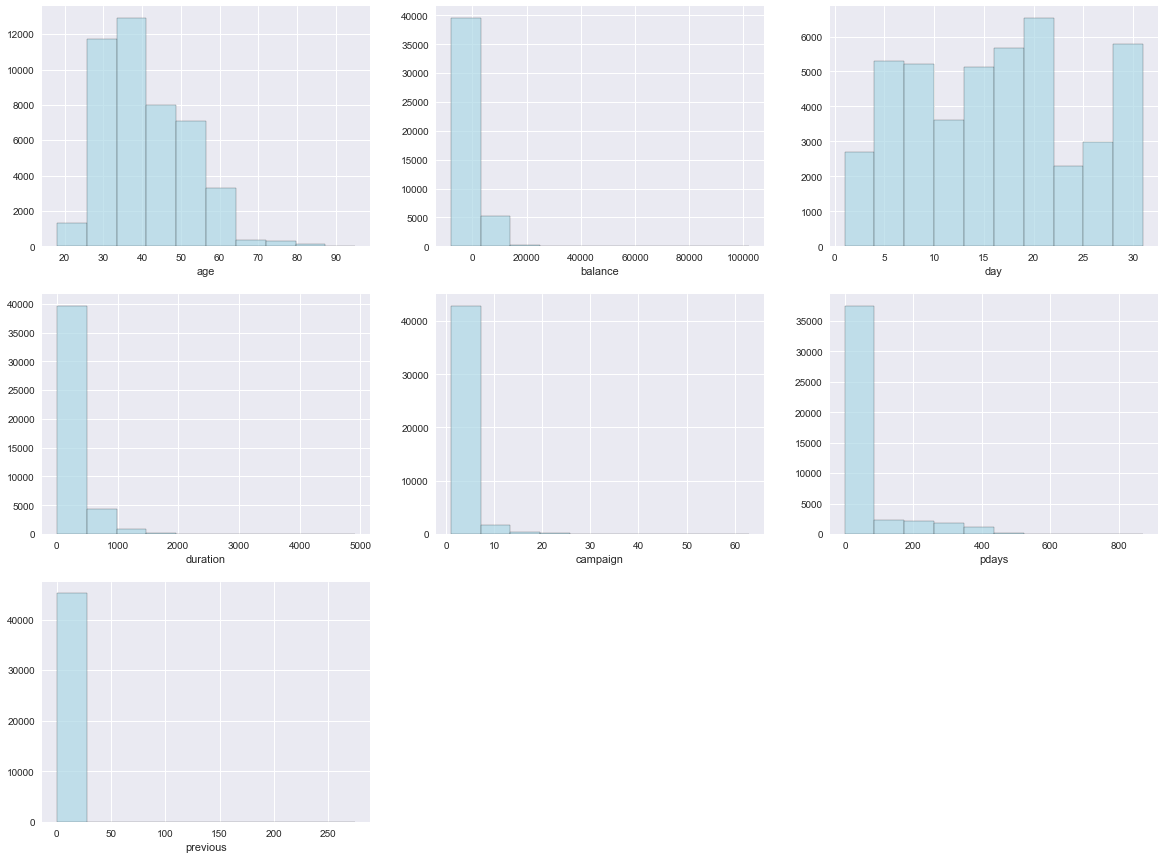

In [60]:
#Plots to see the distribution of the continuous features individually

def plotDistrubtion(col, pos):
    plt.subplot(3,3,pos)
    plt.hist(col, color='lightblue', edgecolor = 'black', alpha = 0.7)
    plt.xlabel(col.name)

plt.figure(figsize= (20,15))

plotDistrubtion(dataFrame.age, 1)
plotDistrubtion(dataFrame.balance, 2)
plotDistrubtion(dataFrame.day, 3)
plotDistrubtion(dataFrame.duration,4)
plotDistrubtion(dataFrame.campaign, 5)
plotDistrubtion(dataFrame.pdays, 6)
plotDistrubtion(dataFrame.previous, 7)

<b>Findings:</b> 
    * Balance, Pdays, Campaign, duration, Previous all these categorical features have outliers and data is right skewed.

In [61]:
#Explore Personal_Loan classification
dataFrame.Target.value_counts()

0    39922
1     5289
Name: Target, dtype: int64

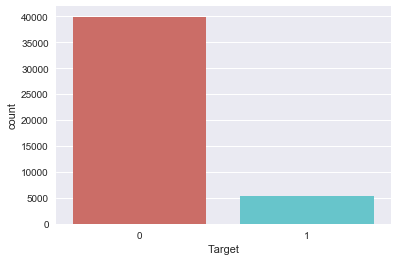

In [62]:
sn.countplot(x='Target', data=dataFrame, palette='hls')

In [63]:
target_yes = len(dataFrame[dataFrame.Target==1])
target_no = len(dataFrame[dataFrame.Target==0])
total = target_yes + target_no
per_target_yes = target_yes/(total)
print("percentage of Target Yes = ", per_target_yes*100)
per_target_no = target_no/(total)
print("percentage of Target No", per_target_no*100)

percentage of Target Yes =  11.698480458295547
percentage of Target No 88.30151954170445


In [64]:

dataFrame[['age', 'balance','day', 'duration', 'campaign', 'pdays', 'previous', 'Target']].groupby(["Target"]).mean()

,age,balance,duration,campaign,pdays,previous
Target,,,,,,
0,40.838986,1303.714969,221.182806,2.846350,36.421372,0.502154
1,41.670070,1804.267915,537.294574,2.141047,68.702968,1.170354


<b>Findings:</b> 
    * The target column  is imbalanced. The ratio is 88 : 12.
    * The customer who have subscribed to Term deposit had long duaration of talk.
    * The customer who have subscribed to Term deposit has long gap in contacting them.
    

### Step 4. Data Preparation for Model building 

In [65]:
#Remove attributes which doesnot play significant role in predecting the class.
#you can't know the duration of a call beforehand, thus it can't be used in your model

dataFrame = dataFrame.drop(['duration'], axis=1)

In [66]:

X = dataFrame.loc[:, dataFrame.columns != 'Target']
# convert all attributes to Z scale 
X = X.apply(zscore)
y = dataFrame.loc[:, dataFrame.columns == 'Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)


### Step 5. Build Models using Base Model 

#### 5.1. Using Logistic Regression Model

In [67]:

# A generic function to execute model, calculate model score and print confusion matrix
def executeModel(model, X_train, y_train ):
    target_names = ['class 0', 'class 1']
    model.fit(X_train, y_train.values.ravel())
    y_predict = model.predict(X_test)
    

    model_score = model.score(X_test, y_test)
   
    print(metrics.confusion_matrix( y_test,y_predict ))
    
    print(classification_report(y_test, y_predict,target_names=target_names))
    print('Accuracy model on test set: {:.2f}'.format(model_score))
    print ('Precesion Score for Class 1: {:.2f}'.format(precision_score(y_test,y_predict,pos_label=1 )))
    print ('Recall Score for Class 1: {:.2f}'.format(recall_score(y_test,y_predict, pos_label=1)))
    print ('F1 Score for Class 1: {:.2f}'.format(f1_score(y_test,y_predict )))  
    
    return (model_score, precision_score(y_test,y_predict ), recall_score(y_test,y_predict ), f1_score(y_test,y_predict ))

# A generic method to plot ROC curve
def plotROC(tmpmodel, X_train, y_train, name):
    roc_auc = roc_auc_score(y_test, tmpmodel.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, tmpmodel.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label= name+' (auc = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

[[12012    18]
 [ 1513    21]]
              precision    recall  f1-score   support

     class 0       0.89      1.00      0.94     12030
     class 1       0.54      0.01      0.03      1534

    accuracy                           0.89     13564
   macro avg       0.71      0.51      0.48     13564
weighted avg       0.85      0.89      0.84     13564

Accuracy model on test set: 0.89
Precesion Score for Class 1: 0.54
Recall Score for Class 1: 0.01
F1 Score for Class 1: 0.03


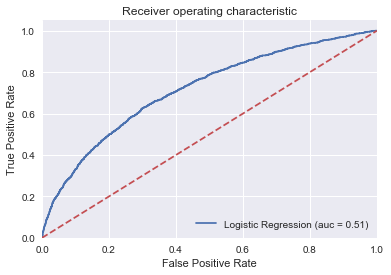

In [68]:
# Fit the Logistic Regression Model
model_logReg = LogisticRegression(solver='liblinear')
executeModel (model_logReg, X_train, y_train)
plotROC(model_logReg,X_train, y_train, "Logistic Regression")

<b>Findings:</b>
    * Precesion is good and recall is very bad for Class 1 . 
    * The Harmonic meaen of Precsion and recall - F1 score for Class 1 is very low. 
    * Logistic Regression is not working well

#### 5.2. Using Naive Bayes Model

[[10123  1907]
 [  920   614]]
              precision    recall  f1-score   support

     class 0       0.92      0.84      0.88     12030
     class 1       0.24      0.40      0.30      1534

    accuracy                           0.79     13564
   macro avg       0.58      0.62      0.59     13564
weighted avg       0.84      0.79      0.81     13564

Accuracy model on test set: 0.79
Precesion Score for Class 1: 0.24
Recall Score for Class 1: 0.40
F1 Score for Class 1: 0.30


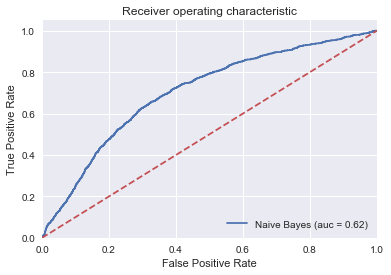

In [69]:
# Fit the Naive Bayes Model
nb_model = GaussianNB()
executeModel (nb_model, X_train, y_train)
plotROC(nb_model,X_train, y_train, "Naive Bayes")

<b>Findings:</b>
    * Precession is low and recall is better Class 1. 
    * The F1 score for Class 1 is better. 
    * AUC has better than previous models
    * Naive Bayes is not working well, but better than logistic Regression.

#### 5.3. Using KNN Model

[[11513   517]
 [ 1191   343]]
              precision    recall  f1-score   support

     class 0       0.91      0.96      0.93     12030
     class 1       0.40      0.22      0.29      1534

    accuracy                           0.87     13564
   macro avg       0.65      0.59      0.61     13564
weighted avg       0.85      0.87      0.86     13564

Accuracy model on test set: 0.87
Precesion Score for Class 1: 0.40
Recall Score for Class 1: 0.22
F1 Score for Class 1: 0.29


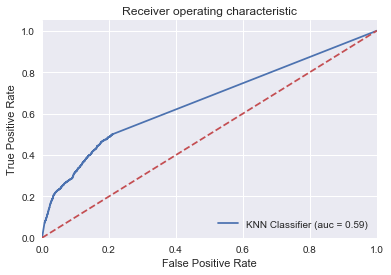

In [70]:
# Fit the KNN Model
knn_model = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')
executeModel (knn_model, X_train, y_train)
plotROC(knn_model, X_train, y_train, "KNN Classifier")

<b>Findings:</b>
    * The F1 score for Class 1 is comparable to Naive Bayes. 
    * Still not a good performance.
    

#### 5.4.1 Using Decision Tree

[[10798  1232]
 [ 1036   498]]
              precision    recall  f1-score   support

     class 0       0.91      0.90      0.90     12030
     class 1       0.29      0.32      0.31      1534

    accuracy                           0.83     13564
   macro avg       0.60      0.61      0.61     13564
weighted avg       0.84      0.83      0.84     13564

Accuracy model on test set: 0.83
Precesion Score for Class 1: 0.29
Recall Score for Class 1: 0.32
F1 Score for Class 1: 0.31


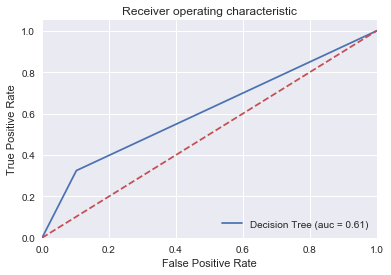

In [71]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' , random_state=15)
executeModel (dt_model, X_train, y_train)
plotROC(dt_model, X_train, y_train, "Decision Tree")



<b>Findings:</b>
    * Precession and recall for Class 1 is better than other models.
    * F1 score is also better.
    * AUC is better when compared with other models
    

#### 5.4.2 Using Decision Tree with regularization

[[12017    13]
 [ 1509    25]]
              precision    recall  f1-score   support

     class 0       0.89      1.00      0.94     12030
     class 1       0.66      0.02      0.03      1534

    accuracy                           0.89     13564
   macro avg       0.77      0.51      0.49     13564
weighted avg       0.86      0.89      0.84     13564

Accuracy model on test set: 0.89
Precesion Score for Class 1: 0.66
Recall Score for Class 1: 0.02
F1 Score for Class 1: 0.03


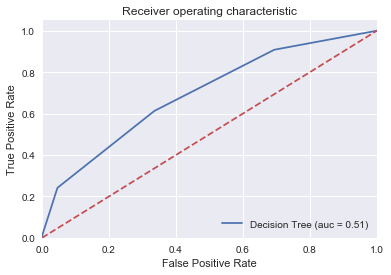

In [72]:
#
dt_model = DecisionTreeClassifier(criterion = 'entropy' , random_state=15, max_depth = 3)
executeModel (dt_model, X_train, y_train)
plotROC(dt_model, X_train, y_train, "Decision Tree")




                Imp
age        0.000000
job        0.000000
marital    0.000000
education  0.000000
default    0.000000
balance    0.000000
housing    0.201807
loan       0.000000
contact    0.392767
day        0.008092
month      0.043159
campaign   0.000000
pdays      0.354175
previous   0.000000
poutcome   0.000000


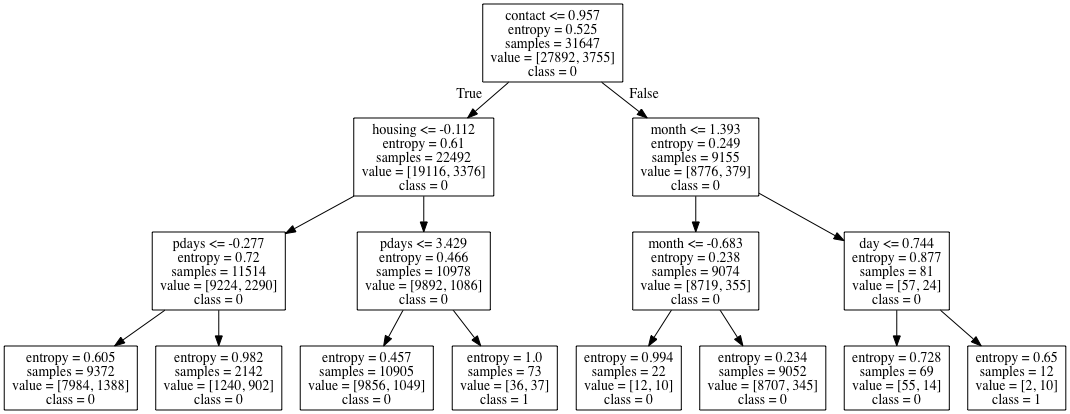

In [73]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

train_char_label = ['0', '1']

Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

system("dot -Tpng credit_tree.dot -o credit_tree.png")
Image("credit_tree.png")

[[11597   433]
 [ 1148   386]]
              precision    recall  f1-score   support

     class 0       0.91      0.96      0.94     12030
     class 1       0.47      0.25      0.33      1534

    accuracy                           0.88     13564
   macro avg       0.69      0.61      0.63     13564
weighted avg       0.86      0.88      0.87     13564

Accuracy model on test set: 0.88
Precesion Score for Class 1: 0.47
Recall Score for Class 1: 0.25
F1 Score for Class 1: 0.33


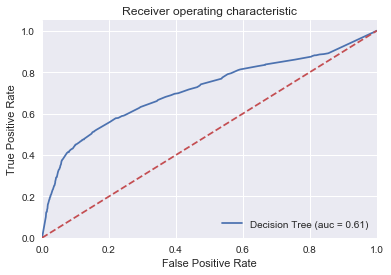

In [74]:



dt_model_r = DecisionTreeClassifier(criterion = 'entropy', max_depth = 12, random_state=random_state_count)
executeModel (dt_model_r, X_train, y_train)
plotROC(dt_model_r, X_train, y_train, "Decision Tree")



<b>Findings:</b>
    * with Max_depth = 12 the Precession and recall for Class 1 is better compared with decision tree without regularization. 
    * AUC is better when compared with other models
    * This is the best model till now.

### Step 6. Using Ensemble Models

#### 6.1 Using Bagging Technique

[[11701   329]
 [ 1174   360]]
              precision    recall  f1-score   support

     class 0       0.91      0.97      0.94     12030
     class 1       0.52      0.23      0.32      1534

    accuracy                           0.89     13564
   macro avg       0.72      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564

Accuracy model on test set: 0.89
Precesion Score for Class 1: 0.52
Recall Score for Class 1: 0.23
F1 Score for Class 1: 0.32


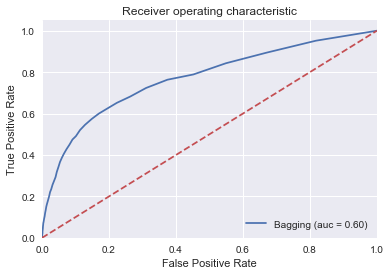

In [75]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier( n_estimators=50, random_state=random_state_count)
#bgcl = BaggingClassifier(n_estimatorsestimators_count)

executeModel (bgcl, X_train, y_train)
plotROC(bgcl, X_train, y_train, "Bagging")

<b>Findings:</b>
    * Precession and recall for Class 1 is better compared other models 
    * This is the best model till now, it is on par with decision tree with regularization.

#### 6.2 Using Bagging Technique - With Naive Bayes Model

[[10161  1869]
 [  930   604]]
              precision    recall  f1-score   support

     class 0       0.92      0.84      0.88     12030
     class 1       0.24      0.39      0.30      1534

    accuracy                           0.79     13564
   macro avg       0.58      0.62      0.59     13564
weighted avg       0.84      0.79      0.81     13564

Accuracy model on test set: 0.79
Precesion Score for Class 1: 0.24
Recall Score for Class 1: 0.39
F1 Score for Class 1: 0.30


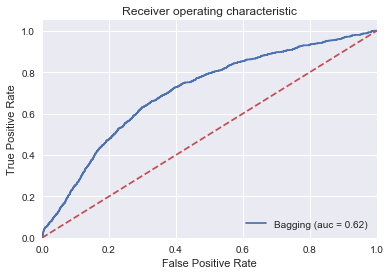

In [76]:
bgcl = BaggingClassifier(base_estimator=nb_model, n_estimators=estimators_count, random_state=random_state_count)
#bgcl = BaggingClassifier(n_estimators=50)

executeModel (bgcl, X_train, y_train)
plotROC(bgcl, X_train, y_train, "Bagging")

<b>Findings:</b>
    * Precession and recall for Class 1 is not great

#### 6.3 Using Bagging Technique - With Logistic Regression

[[12010    20]
 [ 1512    22]]
              precision    recall  f1-score   support

     class 0       0.89      1.00      0.94     12030
     class 1       0.52      0.01      0.03      1534

    accuracy                           0.89     13564
   macro avg       0.71      0.51      0.48     13564
weighted avg       0.85      0.89      0.84     13564

Accuracy model on test set: 0.89
Precesion Score for Class 1: 0.52
Recall Score for Class 1: 0.01
F1 Score for Class 1: 0.03


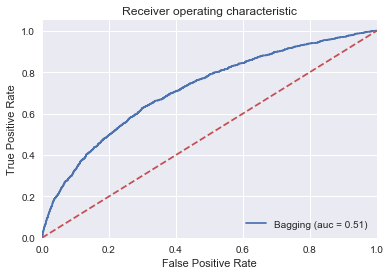

In [77]:
bgcl = BaggingClassifier(base_estimator=model_logReg, n_estimators=estimators_count, random_state=random_state_count)
#bgcl = BaggingClassifier(n_estimators=50)

executeModel (bgcl, X_train, y_train)
plotROC(bgcl, X_train, y_train, "Bagging")

<b>Findings:</b>
    * Recall and F1 for Class 1 is very bad

#### 6.4 Using Ada Boosting 

[[11879   151]
 [ 1292   242]]
              precision    recall  f1-score   support

     class 0       0.90      0.99      0.94     12030
     class 1       0.62      0.16      0.25      1534

    accuracy                           0.89     13564
   macro avg       0.76      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564

Accuracy model on test set: 0.89
Precesion Score for Class 1: 0.62
Recall Score for Class 1: 0.16
F1 Score for Class 1: 0.25


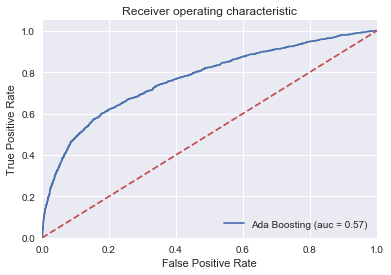

In [78]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=estimators_count, random_state=random_state_count)
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=estimators_count, random_state=random_state_count)
executeModel (abcl, X_train, y_train)
plotROC(abcl, X_train, y_train, "Ada Boosting")

<b>Findings:</b>
    * Precession and recall for Class 1 is not bad

#### 6.5 Using Ada Boosting with Naive Bayes

[[9667 2363]
 [1156  378]]
              precision    recall  f1-score   support

     class 0       0.89      0.80      0.85     12030
     class 1       0.14      0.25      0.18      1534

    accuracy                           0.74     13564
   macro avg       0.52      0.52      0.51     13564
weighted avg       0.81      0.74      0.77     13564

Accuracy model on test set: 0.74
Precesion Score for Class 1: 0.14
Recall Score for Class 1: 0.25
F1 Score for Class 1: 0.18


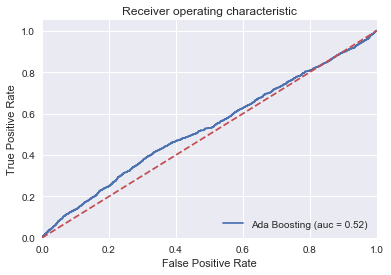

In [79]:
abcl = AdaBoostClassifier(base_estimator=nb_model, n_estimators=estimators_count, random_state=random_state_count)
executeModel (abcl, X_train, y_train)
plotROC(abcl, X_train, y_train, "Ada Boosting")

<b>Findings:</b>
    * Precession and recall for Class 1 is not very bad
    * F1 score is less
    

#### 6.6 Using Ada Boosting with Logistic Regression

[[12027     3]
 [ 1529     5]]
              precision    recall  f1-score   support

     class 0       0.89      1.00      0.94     12030
     class 1       0.62      0.00      0.01      1534

    accuracy                           0.89     13564
   macro avg       0.76      0.50      0.47     13564
weighted avg       0.86      0.89      0.83     13564

Accuracy model on test set: 0.89
Precesion Score for Class 1: 0.62
Recall Score for Class 1: 0.00
F1 Score for Class 1: 0.01


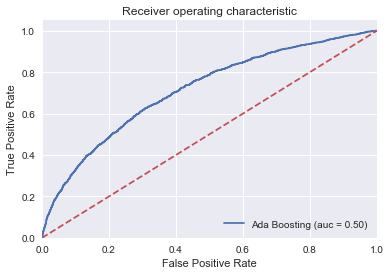

In [80]:
#abcl = AdaBoostClassifier(n_estimators=estimators_count, random_state=random_state_count)
abcl = AdaBoostClassifier(base_estimator=model_logReg, n_estimators=estimators_count, random_state=random_state_count)
executeModel (abcl, X_train, y_train)
plotROC(abcl, X_train, y_train, "Ada Boosting")

<b>Findings:</b>
    * recall for Class 1 is very bad. F1 score is low.

#### 6.7 Using Gradient Boosting 

[[11905   125]
 [ 1302   232]]
              precision    recall  f1-score   support

     class 0       0.90      0.99      0.94     12030
     class 1       0.65      0.15      0.25      1534

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.59     13564
weighted avg       0.87      0.89      0.86     13564

Accuracy model on test set: 0.89
Precesion Score for Class 1: 0.65
Recall Score for Class 1: 0.15
F1 Score for Class 1: 0.25


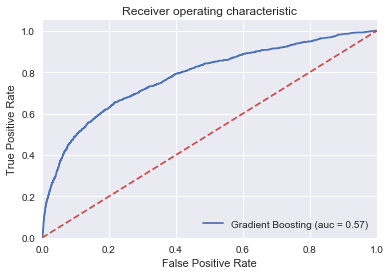

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = estimators_count, random_state=random_state_count)
executeModel (gbcl, X_train, y_train)
plotROC(gbcl, X_train, y_train, "Gradient Boosting")

<b>Findings:</b>
    * Recall for Class 1 is bad
    * F1 score is better

#### 6.8 Using XGBoost 

[[11872   158]
 [ 1267   267]]
              precision    recall  f1-score   support

     class 0       0.90      0.99      0.94     12030
     class 1       0.63      0.17      0.27      1534

    accuracy                           0.89     13564
   macro avg       0.77      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564

Accuracy model on test set: 0.89
Precesion Score for Class 1: 0.63
Recall Score for Class 1: 0.17
F1 Score for Class 1: 0.27


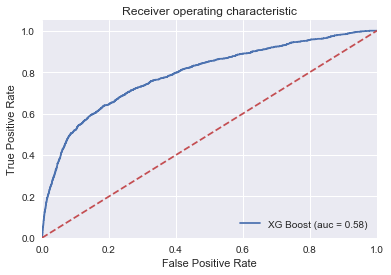

In [82]:
xgboost_model = XGBClassifier()
executeModel (xgboost_model, X_train, y_train)
plotROC(xgboost_model, X_train, y_train, "XG Boost")

<b>Findings:</b>
    * Class 1 Precesion is good and Recall is ok. F1 Score is not bad.
    

#### 6.6 Using Random Forest

[[11806   224]
 [ 1241   293]]
              precision    recall  f1-score   support

     class 0       0.90      0.98      0.94     12030
     class 1       0.57      0.19      0.29      1534

    accuracy                           0.89     13564
   macro avg       0.74      0.59      0.61     13564
weighted avg       0.87      0.89      0.87     13564

Accuracy model on test set: 0.89
Precesion Score for Class 1: 0.57
Recall Score for Class 1: 0.19
F1 Score for Class 1: 0.29


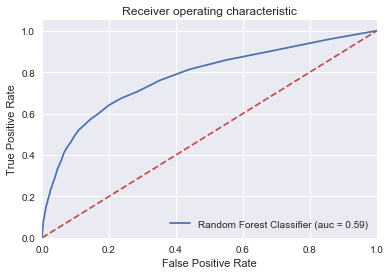

In [83]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=random_state_count)
executeModel (rfcl, X_train, y_train)
plotROC(rfcl, X_train, y_train, "Random Forest Classifier")

<b>Findings:</b>
    * Class 1 Precesion is good and Recall is ok. F1 Score is not bad.
    

### Step 7. Comparision of Classification Models Performance


<Table border=1, align=left>
<TR align=left>
    <TH rowspan=2>Model Name</TH>
    <TH rowspan=2>Model Score</TH>
    <TH colspan=3 align=center>Accuracy of Class 1</TH>    
    <TH rowspan=2>AUC</TH>
</TR>
<TR align=left>
    
    <TH>Recall  </TH>
    <TH>Precession</TH>
    <TH>F1-Score</TH>
    
</TR>

<TR >
    <TD>
        Logistic Regresssion
    </TD>
    <TD>
       0.89
    </TD>
    <TD>
       0.01       
    </TD>
    <TD> 
      0.54
    </TD>
     <TD>
       0.03
    </TD>
      <TD>
       0.51
    </TD>
</TR>

<TR>
    <TD>
        Naive Bayes Classifier
    </TD>
    <TD>
       0.79
    </TD>
    <TD>
      0.40      
    </TD>
    <TD> 
      0.24
    </TD>
     <TD>
      0.30
    </TD>
      <TD>
       0.62
    </TD>
</TR>

<TR>
    <TD>
        KNN Classifier
    </TD>
    <TD>
       0.87 
    </TD>
    <TD>
       0.22                 
    </TD>
    <TD> 
       0.40      
    </TD>
     <TD>
       0.29   
    </TD>
      <TD>
       0.59
    </TD>
</TR>
<TR>
    <TD>
        Decision Tree
    </TD>
    <TD>
       0.83
    </TD>
    <TD>
       0.32       
    </TD>
    <TD> 
       0.29  
    </TD>
     <TD>
       0.31 
    </TD>
      <TD>
       0.61
    </TD>
</TR>

<TR style="font-weight:bold; color: blue">
    <TD>
        Decision Tree with Regularization
    </TD>
    <TD>
       0.88
    </TD>
    <TD>
       0.25                  
    </TD>
    <TD> 
       0.47  
    </TD>
     <TD>
       0.33 
    </TD>
      <TD>
       0.61 
    </TD>
</TR>

<TR style="font-weight:bold; color: blue">
    <TD>
        Bagging Technique
    </TD>
    <TD>
       0.89
    </TD>
    <TD>
       0.23                             
    </TD>
    <TD> 
       0.52
    </TD>
     <TD>
       0.32
    </TD>
      <TD>
       0.60
    </TD>
</TR>

<TR>
    <TD>
        Bagging Technique - With Naive Bayes
    </TD>
    <TD>
       0.79
    </TD>
    <TD>
       0.39                                        
    </TD>
    <TD> 
       0.24   
    </TD>
     <TD>
       0.30 
    </TD>
      <TD>
       0.62
    </TD>
</TR>

<TR>
    <TD>
        Bagging Technique - With Logistic Regression
    </TD>
    <TD>
       0.89
    </TD>
    <TD>
       0.01                                                     
    </TD>
    <TD> 
       0.52  
    </TD>
     <TD>
       0.03
    </TD>
      <TD>
       0.51
    </TD>
</TR>

<TR>
    <TD>
        Ada Boosting 
    </TD>
    <TD>
       0.89
    </TD>
    <TD>
       0.16                                                                 
    </TD>
    <TD> 
       0.62  
    </TD>
     <TD>
       0.25 
    </TD>
      <TD>
       0.57
    </TD>
</TR>

<TR>
    <TD>
        Ada Boosting - with Naive Bayes
    </TD>
    <TD>
       0.74
    </TD>
    <TD>
       0.25                                                                
    </TD>
    <TD> 
       0.14  
    </TD>
     <TD>
       0.18
    </TD>
      <TD>
       0.52
    </TD>
</TR>

<TR>
    <TD>
        Ada Boosting - with Logistic Regression
    </TD>
    <TD>
       0.89
    </TD>
    <TD>
       0.00                                                                
    </TD>
    <TD> 
       0.62  
    </TD>
     <TD>
       0.01
    </TD>
      <TD>
       0.50
    </TD>
</TR>

<TR>
    <TD>
        Gradient Boosting
    </TD>
    <TD>
       0.89
    </TD>
    <TD>
       0.15                                                                              
    </TD>
    <TD> 
       0.65  
    </TD>
     <TD>
       0.25
    </TD>
      <TD>
       0.57
    </TD>
</TR>

<TR>
    <TD>
        XGBoost 
    </TD>
    <TD>
       0.89
    </TD>
    <TD>
       0.17                                                                             
    </TD>
    <TD> 
       0.63   
    </TD>
     <TD>
       0.27 
    </TD>
      <TD>
       0.58
    </TD>
</TR>

<TR >
    <TD>
        Random Forest
    </TD>
    <TD>
       0.89
    </TD>
    <TD>
       0.19                                                                                         
    </TD>
    <TD> 
       0.57    
    </TD>
     <TD>
       0.29
    </TD>
      <TD>
       0.59
    </TD>
</TR>

</Table>


##### From the above table we can conclude that     <u>Bagging Technique</u> and <u>Decision Tree with Regularization</u> is yeilding better results when compared to other models as F1 Score is highest and AUC is fairly good.